# WorkStation Price Prediction

### Domain - **`TOURISM`**

#### Created by - Shrikant S Biyani

#### (MachineHacke.com)

### **Overview**

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building **to predict the price per person for your next workstation trip**. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.


#### **Attributes:**

- **Uniq Id** - Unique Identifier per row sample
- **Package Name** - Name of the tour package
- **Package Type** - Type of the tour package
- **Destination** - A destination place
- **Itinerary** - complete itinerary
- **Places Covered** - covered places in the itinerary
- **Travel Date** - Date of travel
- **Hotel Details** - Details of the hotel stay
- **Start City** - Start place for the travel
- **Airline** - Flight details
- **Flight Stops** - Intermediate stops if any
- **Meals** - Inflight meals or services
- **Sightseeing Places Covered** - Itinerary details regarding sightseeing
- **Cancellation Rules** - Cancellation policy as per travel company


- **Per Person Price** - Price of the tour package per person **(Target Column)**

##### Skills:
- Advanced Regression Modeling
- Feature Engineering, Ensemble Modeling
- Optimizing RMSLE(Root Mean Squared Log Error) as a metric to generalize well on unseen data


### Evaluation

  + using the **RMSLE metric**. 
      - use **np.sqrt(mean_squared_log_error(actual, predicted))**

  + submission of 9000 rows in single columns. code for it as
      - **submission_df.to_csv('my_submission_file.csv', index=False)**

#### Installing Required Libraries

In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
!pip install -U scikit-learn

#### Loading Required Pacakages

In [1]:
import pandas as pd # for data manipuplation
import numpy as np # for linear algebra & array manipulation
import statistics # for statistical evaluation

# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for line magic to get plot in line immediate after cell below code
%matplotlib inline


# Model Selections
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Using Prerocessing for Encoder / Scaler purpose
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Algorithms for Model Building
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor


# For Evaluating Model
from sklearn.metrics import mean_squared_log_error

# For Dealing Warnings arise while running Machine Learning Algorithms
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Loding Required Pacakages for feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

#### Loading Dataset

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

# Displaying shape of Train & Test Data
print(f'>>> The Train dataset consist of{train_data.shape[0]} rows and {train_data.shape[1]} columns.')
print(f'>>> The Test dataset consist of{test_data.shape[0]} rows and {test_data.shape[1]} columns.')

>>> The Train dataset consist of21000 rows and 15 columns.
>>> The Test dataset consist of9000 rows and 14 columns.


In [3]:
# Displaying heads of train & test data
train_data.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [4]:
test_data.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
0,12c47aefbcca65d6156ba0bc7946704b,Goa 5N stay with flights & Transfers-North Goa,Luxury,Goa,5N Goa,Goa,13-07-2021,Novotel Goa Resort & Spa:4.1,New Delhi,IndiGo,0,4,Not Available,Cancellation any time after making the 1st pay...
1,156febf7d27315ae9f210ed13bca3ac2,Into the Wild - Weekend at Bandipur National Park,Luxury,Bandipur,2N Bandipur,Bandipur,20-03-2021,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,Not Available,0,4,Bandipur National Park,This cancellation policy is applicable for boo...
2,a7f43314e3ee6464a4e35b874bddf2ea,Unforgettable Munnar Getaway - Private Picnic ...,Standard,Munnar,3N Munnar,Munnar,09-02-2022,Not Available,New Delhi,Not Available,2,3,Old Munnar Town | Eravikulam national park | ...,This cancellation policy is applicable for boo...
3,d9cc4b407f3d5d290560c03d9ac71035,Munnar for Adventure Lovers - Top Valley Trek,Deluxe,Munnar,3N Munnar,Munnar,16-05-2021,Not Available,Mumbai,Not Available,1,3,Tata Tea Museum | Eravikulam national park | ...,This cancellation policy is applicable for boo...
4,b3bbc8aa6429feb260e9ac0a91f252c4,Splendours of Kerala - Make your own Tea,Luxury,Cochin|Munnar|Thekkady|Allepey,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allepey,Cochin|Munnar|Thekkady|Allepey,13-10-2021,Casino Hotel - Cgh Earth-MMT Holidays Special:...,New Delhi,IndiGo,0,4,Fort Cochin | Dutch Palace | Jewish Synagogue...,Cancellation any time after making the 1st pay...


In [5]:
# pd.DataFrame.info() >
  # Displays a concise summary of a DataFrame.
  # This method displays information about a DataFrame including the index dtype and columns, non-null values and memory usage.

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Uniq Id                     9000 non-null   object
 1   Package Name                9000 non-null   object
 2   Package Type                9000 non-null   object
 3   Destination                 9000 non-null   object
 4   Itinerary                   9000 non-null   object
 5   Places Covered              9000 non-null   object
 6   Travel Date                 9000 non-null   object
 7   Hotel Details               9000 non-null   object
 8   Start City                  9000 non-null   object
 9   Airline                     9000 non-null   object
 10  Flight Stops                9000 non-null   int64 
 11  Meals                       9000 non-null   int64 
 12  Sightseeing Places Covered  9000 non-null   object
 13  Cancellation Rules          9000 non-null   obje

In [7]:
# pd.DataFrame.nunique() -
  # Count distinct observations over requested axis.
  # Return Series with number of distinct observations. Can ignore NaN values.

train_data.nunique(axis = 0, dropna= True)

Uniq Id                       21000
Package Name                   2204
Package Type                      5
Destination                     565
Itinerary                       966
Places Covered                  565
Travel Date                     495
Hotel Details                  6060
Start City                        2
Airline                         314
Flight Stops                      3
Meals                             4
Sightseeing Places Covered     1714
Cancellation Rules               10
Per Person Price              17138
dtype: int64

In [8]:
test_data.nunique(dropna=False)

Uniq Id                       9000
Package Name                  2065
Package Type                     5
Destination                    551
Itinerary                      941
Places Covered                 552
Travel Date                    460
Hotel Details                 3693
Start City                       2
Airline                        216
Flight Stops                     3
Meals                            4
Sightseeing Places Covered    1476
Cancellation Rules               7
dtype: int64

In [9]:
# Checking any missing values

train_data.isnull().sum().any().sum()

0

In [10]:
train_data.isnull().sum()

Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

In [11]:
# train_data.loc[train_data.isnull().any().sum()]
# qty_of_nuls = 1
# train_data.iloc[train_data[(train_data.isnull().sum(axis=1) >= qty_of_nuls)].index]

# I am droping this index because if I impute it with mean, median or even mode it's not gonna work. So i decided to drop this row in Data Preprocessing

#### Data Visualization

In [12]:
train_data['Itinerary'].unique()

array(['1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh',
       '1N Srinagar . 2N Pahalgam . 1N Srinagar',
       '2N Udaipur . 1N Chittorgarh',
       '2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kovalam and Poovar',
       '4N Pattaya . 3N Bangkok', '2N Cochin', '3N Jaipur',
       '2N Kasol . 3N Manali',
       '1N Srinagar . 1N Gulmarg . 2N Pahalgam . 2N Srinagar',
       '2N Udaipur', '2N Kovalam and Poovar . 1N Kanyakumari',
       '1N Cochin . 2N Munnar . 1N Allepey . 2N Kovalam and Poovar',
       '1N Guwahati', '2N Udaipur . 1N Mount Abu',
       '1N Chandigarh . 2N Shimla . 3N Manali . 1N Chandigarh',
       '2N Nainital . 1N Kausani . 2N Corbett', '3N Kodaikanal',
       '1N Srinagar . 1N Gulmarg . 2N Srinagar',
       '2N Shimla . 3N Manali . 2N Dharamshala',
       '3N Ooty . 3N Kodaikanal', '2N Kodaikanal . 2N Ooty . 1N Mysore',
       '2N Jaipur', '1N New Delhi . 1N Agra . 1N Jaipur', '7N Dubai',
       '3N Goa', '3N Gangtok . 1N Pelling . 4N Darjeeling',
       '2N

<AxesSubplot:>

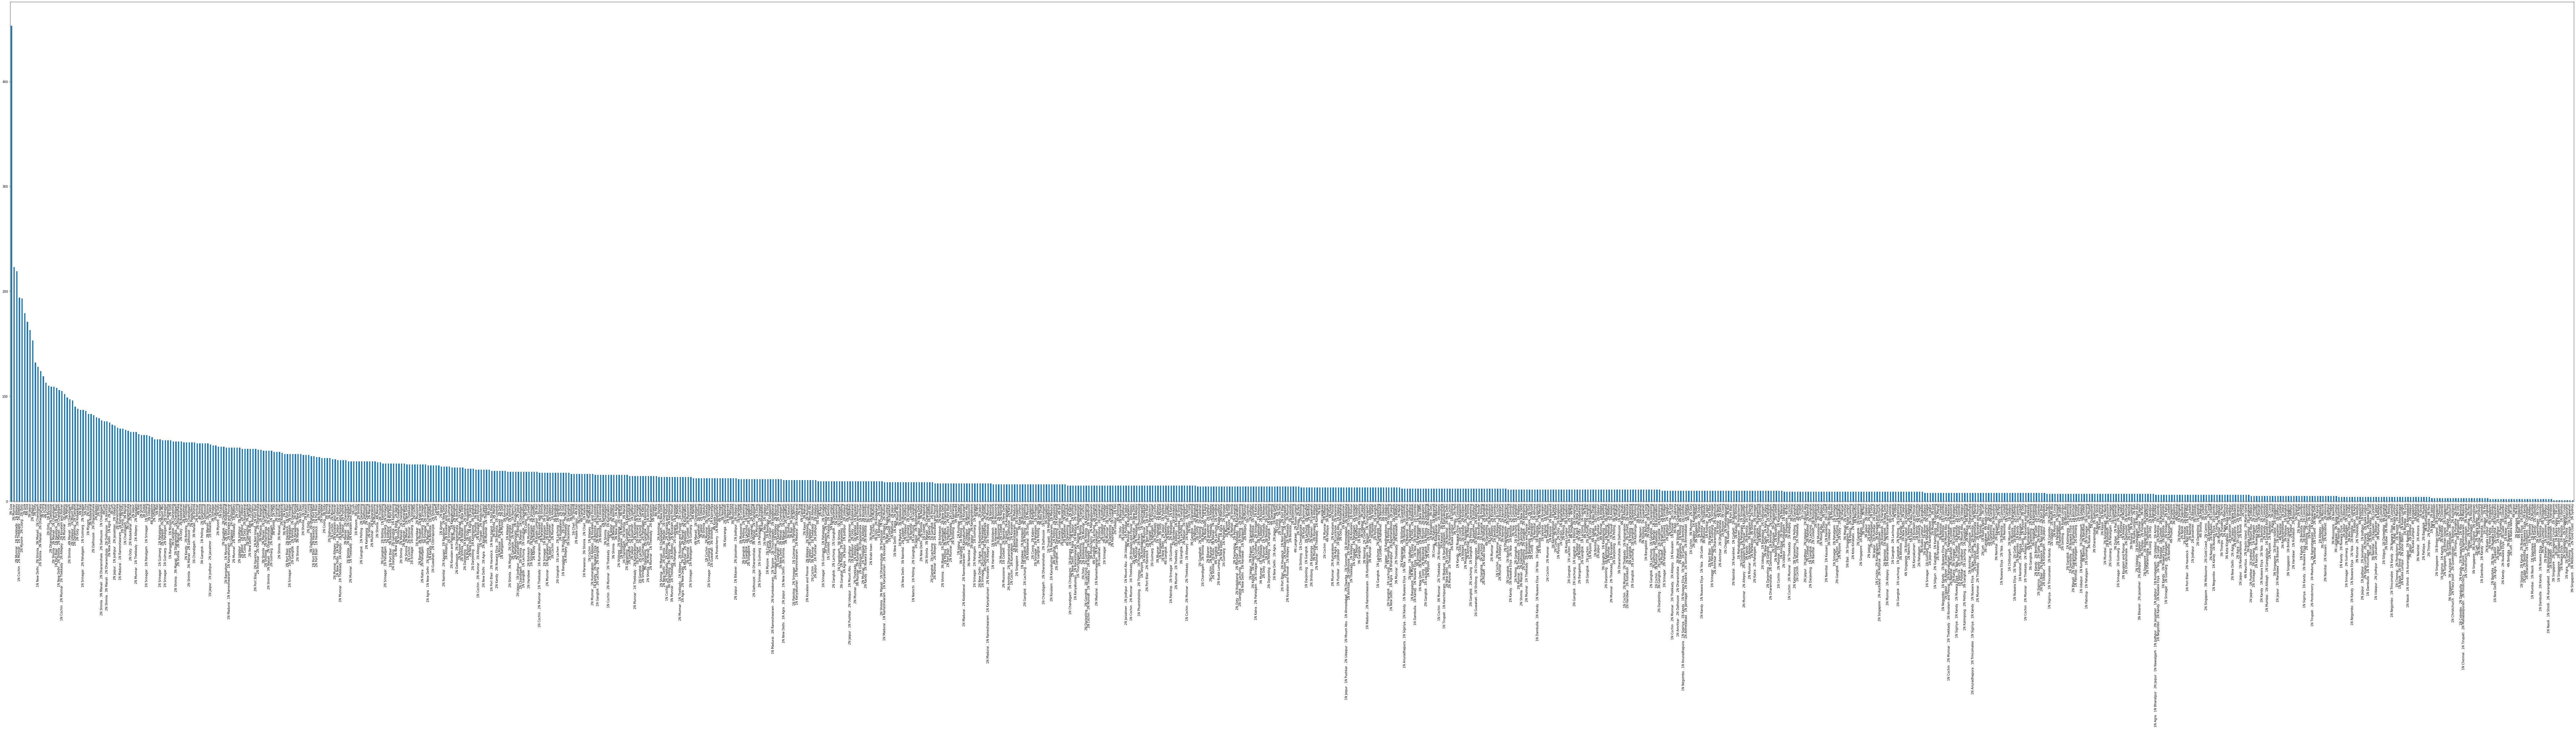

In [13]:
train_data['Itinerary'].value_counts().plot.bar(figsize = (150, 30))

In [14]:
train_data['Package Name'].unique()

array(['Best of Shimla and Manali Holiday from Delhi',
       'Kashmir Valley vacation',
       'Might of Mewar- Udaipur and Chittorgarh', ...,
       'Thrilling Jaisalmer - Midnight Drive on a Ghost Trail',
       'Udaipur with Mount Abu - Unique Retreat',
       'Experience In Malaysian'], dtype=object)

In [15]:
train_data['Package Name'].value_counts()

Holiday in Manali & Chandigarh from Chandigarh         37
Bali Special 4 Nights                                  36
Honeymoon Special - Bangkok Phuket & Krabi             35
Serene Uttarakhand with Kausani                        33
4 Nights in Mysore, Wayanad & Kabini                   32
                                                       ..
A Short Break to Sri Lanka (Without Flights)            1
A Getaway to Goa at Fort Aguada                         1
Young & Free - Party in Goa - By Bus from Hyderabad     1
Udaipur with Mount Abu - Unique Retreat                 1
Mini Kerala - Shared Vehicle - Winter Special           1
Name: Package Name, Length: 2204, dtype: int64

In [16]:
train_data['Package Type'].value_counts()

Deluxe      6006
Standard    5669
Premium     5581
Luxury      3278
Budget       466
Name: Package Type, dtype: int64

<AxesSubplot:title={'center':'Package Types'}>

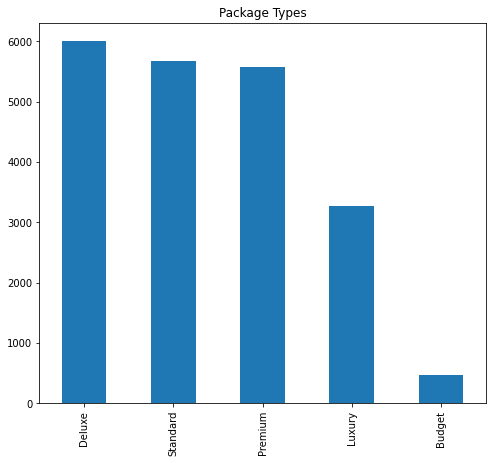

In [17]:
train_data['Package Type'].value_counts().plot(kind = 'bar', figsize = (8, 7), title = 'Package Types')

- from above Bar Graph, **Deluxe Package** are highly demanded, while **Budget Package** are least demanded

In [18]:
train_data['Start City'].value_counts()

New Delhi    13733
Mumbai        7267
Name: Start City, dtype: int64

<AxesSubplot:title={'center':'Start City'}, ylabel='Start City'>

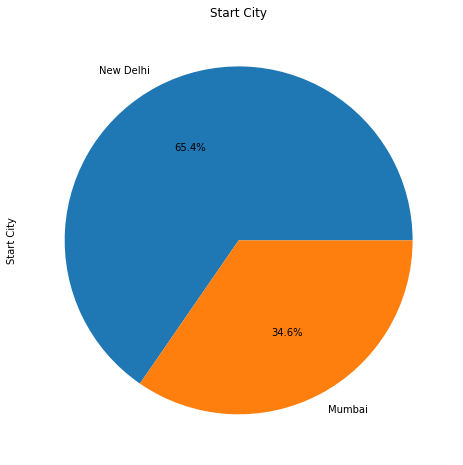

In [19]:
train_data['Start City'].value_counts().plot(kind = 'pie',  autopct='%1.1f%%', figsize=(10, 8), title = ('Start City'))

- from above Pie Chart, around 65% people started their journey from New Delhi, while around 35% people started their journey from Mumbai.

In [20]:
train_data['Meals'].value_counts()

3    11675
5     5581
4     3278
2      466
Name: Meals, dtype: int64

<AxesSubplot:title={'center':'Meals in Flight'}, ylabel='Meals'>

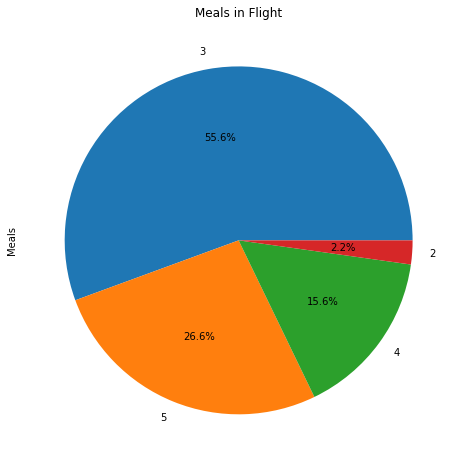

In [21]:
train_data['Meals'].value_counts().plot(kind = 'pie',  autopct='%1.1f%%', figsize=(10, 8), title = ('Meals in Flight'))

- 3 times meals are provided around 56% during Journey in flight, while 2 times meals are provided only around 2%.

In [22]:
train_data['Flight Stops'].value_counts()

0    8859
2    6135
1    6006
Name: Flight Stops, dtype: int64

<AxesSubplot:title={'center':'Numbers of Flight Stops during Journey'}>

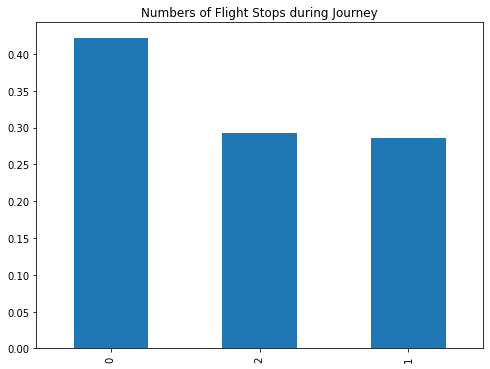

In [23]:
train_data['Flight Stops'].value_counts(normalize = True).plot(kind = 'bar', figsize = (8, 6), 
                                                               title = 'Numbers of Flight Stops during Journey')

- around 45% flights doesn't take stop to reach it's destination.
- while around 55% flights has take stops either 2 stops(around 28%) or 1 stop(around 27%) respectively.

In [24]:
#
train_data['Cancellation Rules'].value_counts()

Cancellation any time after making the 1st payment instalment till the 2nd payment date:The entire amount paid as 1st payment instalment (deposit) would be non-refundable.Cancellation after 2nd payment instalment and before 3rd or final payment date:The total amount that was due at the 2nd payment instalment as per your payment schedule would be non-refundable; anything that you have paid over and above this amount would be refundable.Cancellation after 3rd or final payment date:The full amount paid by you would be non-refundable.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

<AxesSubplot:title={'center':'Cancellation Rules for Journey'}>

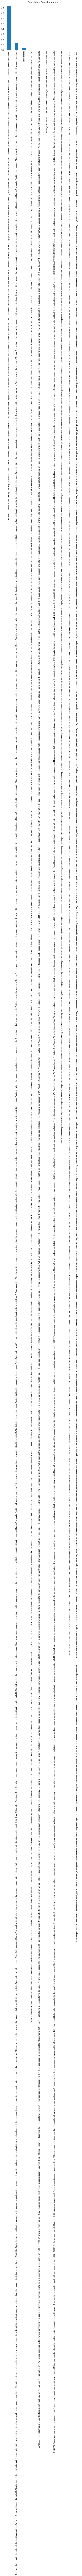

In [25]:
train_data['Cancellation Rules'].value_counts(normalize = True).plot.bar(figsize = (8, 5), 
                                                                         title = 'Cancellation Rules for Journey')

- **Cancellation any time after making the 1st payment instalment till the 2nd payment date** covers around 85% cancellation
- **Not Available** this looks like the value is missing here. We will look into it in later section.

<AxesSubplot:title={'center':'Per Person Price for Journey'}, ylabel='Frequency'>

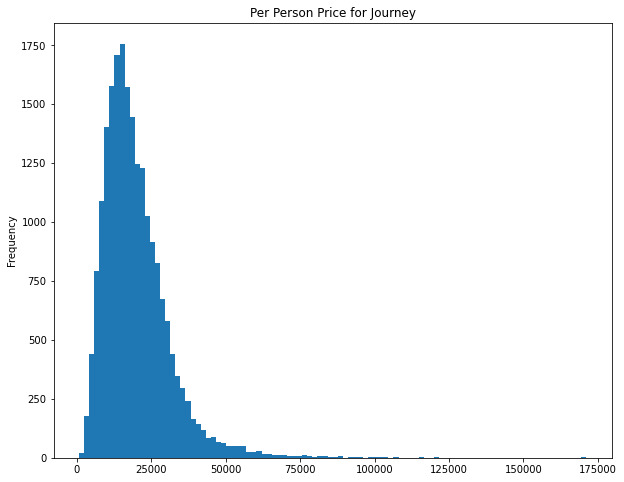

In [26]:
train_data['Per Person Price'].plot(kind = 'hist', bins = 100, figsize = (10, 8), title = 'Per Person Price for Journey')

C:\Users\sharmila_biyani\anaconda3\envs\workstationPricePrediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Per Person Price', ylabel='Density'>

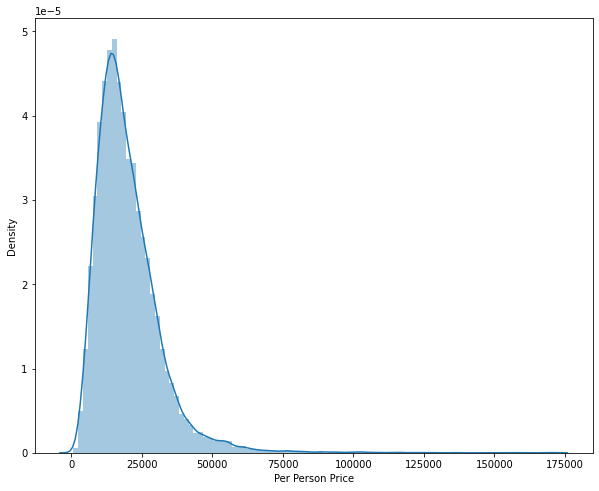

In [27]:
plt.figure(figsize = (10, 8))
sns.distplot(train_data['Per Person Price'], bins = 100)

C:\Users\sharmila_biyani\anaconda3\envs\workstationPricePrediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Per Person Price'>

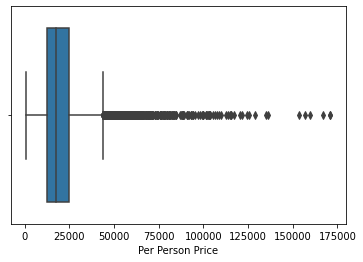

In [28]:
sns.boxplot(train_data['Per Person Price'])

- the target variable is not normalize distributed.
- Target Variable is affected from outliers we can see all 3 plots from above.

In [29]:
train_data['Per Person Price'].describe()

count     21000.000000
mean      20059.330381
std       11643.641766
min         791.000000
25%       12461.000000
50%       17765.500000
75%       25081.375000
max      171062.500000
Name: Per Person Price, dtype: float64

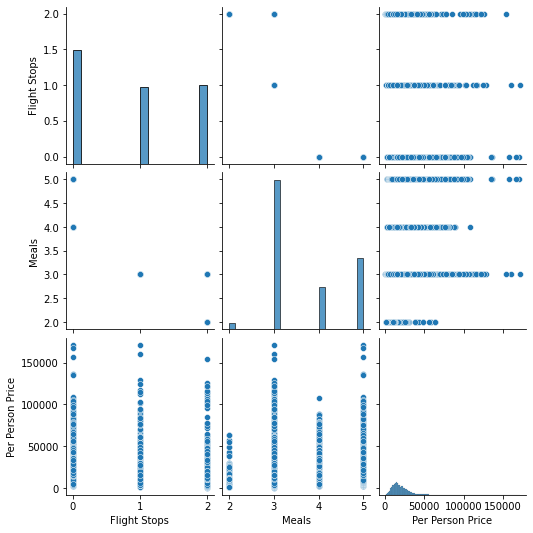

In [30]:
sns.pairplot(train_data)

#### Feature Engineering

In [31]:
train_data.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

In [32]:
train_data['Airline'].unique()

array(['Not Available', 'IndiGo|IndiGo', 'IndiGo', 'Spicejet|Go Air',
       'Spicejet', 'IndiGo|Spicejet', 'Go Air|IndiGo', 'Air India',
       'Spicejet|Spicejet', 'Go Air', 'Emirates|Emirates',
       'Spicejet|Air India|Air India', 'Vistara',
       'Spicejet|IndiGo|IndiGo', 'Spicejet|Spicejet|Spicejet|Spicejet',
       'Thai Airways|Thai Airways|AirAsia Indonesia|Srilankan Airlines|Srilankan Airlines',
       'Spicejet|IndiGo', 'Srilankan Airlines|Srilankan Airlines',
       'IndiGo|IndiGo|IndiGo|IndiGo', 'Air India|Air India|Spicejet',
       'Go Air|IndiGo|IndiGo', 'Spicejet|AirAsia',
       'Emirates|Emirates|Emirates|Emirates', 'Air India|Spicejet',
       'Spicejet|Spicejet|Vistara', 'Air India Express|Air India Express',
       'Malindo Air|AirAsia Indonesia|Malindo Air|Malindo Air',
       'Air India|Air India|Air India|Air India', 'Air India|IndiGo',
       'Malaysia Airlines|Malaysia Airlines|Malaysia Airlines|Malaysia Airlines',
       'Vistara|Spicejet', 'AirAsia|Spicej

In [33]:
train = train_data.copy(deep = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [34]:
# Creating new columns from Destination by spliting it into '1st_arrive' & 'other places'
train[['Primary_Stop', 'Other_Stops']] = train['Destination'].str.split('|', n = 1,expand=True)


In [68]:
train['Places Covered'].unique()

array(['New Delhi|Shimla|Manali|Chandigarh', 'Srinagar|Pahalgam|Srinagar',
       'Udaipur|Chittorgarh',
       'Munnar|Kumarakom|Allepey|Kovalam and Poovar', 'Pattaya|Bangkok',
       'Cochin', 'Jaipur', 'Kasol|Manali',
       'Srinagar|Gulmarg|Pahalgam|Srinagar', 'Udaipur',
       'Kovalam and Poovar|Kanyakumari',
       'Cochin|Munnar|Allepey|Kovalam and Poovar', 'Guwahati',
       'Udaipur|Mount Abu', 'Chandigarh|Shimla|Manali|Chandigarh',
       'Nainital|Kausani|Corbett', 'Kodaikanal',
       'Srinagar|Gulmarg|Srinagar', 'Shimla|Manali|Dharamshala',
       'Ooty|Kodaikanal', 'Kodaikanal|Ooty|Mysore',
       'New Delhi|Agra|Jaipur', 'Dubai', 'Goa',
       'Gangtok|Pelling|Darjeeling',
       'Shimla|Manali|Dharamshala|Dalhousie|Amritsar',
       'Coorg|Ooty|Bandipur', 'Coorg', 'Munnar|Thekkady|Allepey',
       'Shimla', 'Darjeeling',
       'Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar',
       'Gangtok|Lachung|Gangtok', 'Srinagar|Gulmarg',
       'Mysore|Ooty|Bangalore', 'Ka

In [73]:
train.loc[train['Places Covered'] == 'Pattaya|Bangkok']

,Package Name,Package Type,Places Covered,Start City,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Primary_Stop,Period_NightStays,Travel_Month_Calender
4,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,New Delhi,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,Pattaya,7,Dec
270,Magical Pattaya & Bangkok - Super Saver,Premium,Pattaya|Bangkok,Mumbai,0,5,Pattaya Family Freebie | Pattaya Value Pack |...,Cancellation any time after making the 1st pay...,25019.0,Pattaya,5,Dec
653,A Week In Bangkok & Pattaya,Deluxe,Pattaya|Bangkok,New Delhi,1,3,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,18216.0,Pattaya,7,Nov
669,Magical Pattaya & Bangkok - Veg Tour Special,Luxury,Pattaya|Bangkok,Mumbai,0,4,Hotel In Pattaya to Hotel In Bangkok by Share...,Cancellation any time after making the 1st pay...,21762.0,Pattaya,5,Mar
1026,Laze Around In Bangkok & Pattaya 4N 5D,Deluxe,Pattaya|Bangkok,New Delhi,1,3,Under Water World Private Transfer Special | ...,This cancellation policy is applicable for boo...,16564.5,Pattaya,4,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...
19419,Magical Pattaya & Bangkok - Veg Tour Special,Luxury,Pattaya|Bangkok,Mumbai,0,4,Hotel In Pattaya to Hotel In Bangkok by Share...,Cancellation any time after making the 1st pay...,21762.0,Pattaya,5,Jun
19821,A Week In Bangkok & Pattaya,Standard,Pattaya|Bangkok,New Delhi,2,3,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,16058.0,Pattaya,7,Sep
19990,Honeymoon Special - Pattaya & Bangkok,Standard,Pattaya|Bangkok,New Delhi,2,3,"Coral Island Tour with Indian Lunch , Join Sp...",Cancellation any time after making the 1st pay...,16061.5,Pattaya,5,Oct
20242,Honeymoon Special - Pattaya & Bangkok,Premium,Pattaya|Bangkok,New Delhi,0,5,"Coral Island Tour with Indian Lunch , Join Sp...",Cancellation any time after making the 1st pay...,23671.5,Pattaya,5,Nov


In [35]:
train['Itinerary'].unique()

array(['1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh',
       '1N Srinagar . 2N Pahalgam . 1N Srinagar',
       '2N Udaipur . 1N Chittorgarh',
       '2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kovalam and Poovar',
       '4N Pattaya . 3N Bangkok', '2N Cochin', '3N Jaipur',
       '2N Kasol . 3N Manali',
       '1N Srinagar . 1N Gulmarg . 2N Pahalgam . 2N Srinagar',
       '2N Udaipur', '2N Kovalam and Poovar . 1N Kanyakumari',
       '1N Cochin . 2N Munnar . 1N Allepey . 2N Kovalam and Poovar',
       '1N Guwahati', '2N Udaipur . 1N Mount Abu',
       '1N Chandigarh . 2N Shimla . 3N Manali . 1N Chandigarh',
       '2N Nainital . 1N Kausani . 2N Corbett', '3N Kodaikanal',
       '1N Srinagar . 1N Gulmarg . 2N Srinagar',
       '2N Shimla . 3N Manali . 2N Dharamshala',
       '3N Ooty . 3N Kodaikanal', '2N Kodaikanal . 2N Ooty . 1N Mysore',
       '2N Jaipur', '1N New Delhi . 1N Agra . 1N Jaipur', '7N Dubai',
       '3N Goa', '3N Gangtok . 1N Pelling . 4N Darjeeling',
       '2N

##### Spliting 'Itinerary' to get Package period
Here, I am summing up  the all digits as one value for number of night stays in particulare package.


In [36]:
# Extracting digits from 'Itinerary' Series

# Creating new Column based on DayStays
# train["Period_Days"] = train["Itinerary"].apply(lambda x: sum(int(y) for y in x if y.isdigit()) + 1)

# Creating New Column based on NightStays
train["Period_NightStays"] = train["Itinerary"].apply(lambda x: sum(int(y) for y in x if y.isdigit()))

# Changing datatype to sum up
# train['Package_Period'] = train['Package_Period'].astype(float).astype(int)
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Primary_Stop,Other_Stops,Period_NightStays
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,New Delhi,Shimla|Manali|Chandigarh,6
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,Srinagar,Pahalgam|Srinagar,4
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,Udaipur,Chittorgarh,3
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,Munnar,Kumarakom|Allepey|Kovalam and Poovar,6
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,Pattaya,Bangkok,7


- **Reason for inserting DayStays & NightStays Columns** are - Travel Packages are divied into Days + Nights.
    - Here Days are considered for Travel from one place to other and Sightseeing Places
    - While NightStays are considered as Night Hualting or Stay at Hotels
    - So NightStays + 1 = Period Days of Journey.

This is the reason I hace created Period_Days as **actual Journey period**.


<AxesSubplot:>

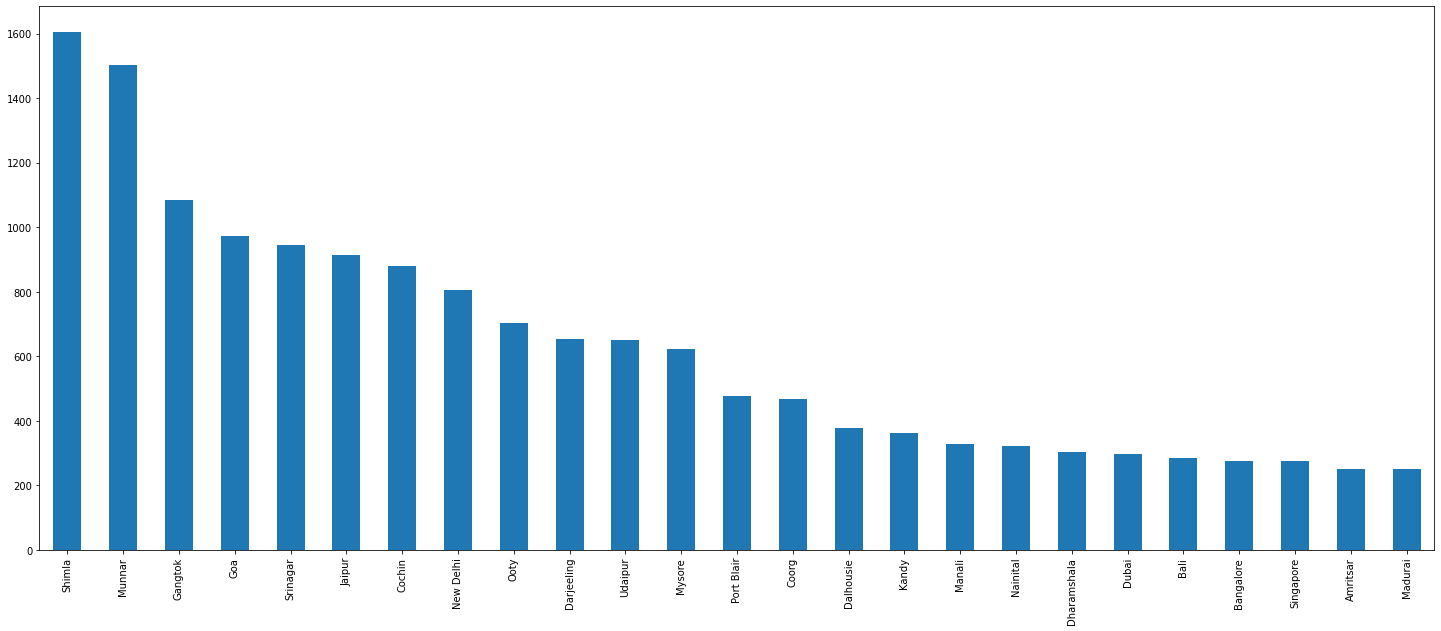

In [37]:
train['Primary_Stop'].value_counts().head(25).plot.bar(figsize = (25, 10))

In [38]:
train["Period_NightStays"].unique()

array([ 6,  4,  3,  7,  2,  5,  1,  8, 10,  9, 11, 12, 14], dtype=int64)

<AxesSubplot:>

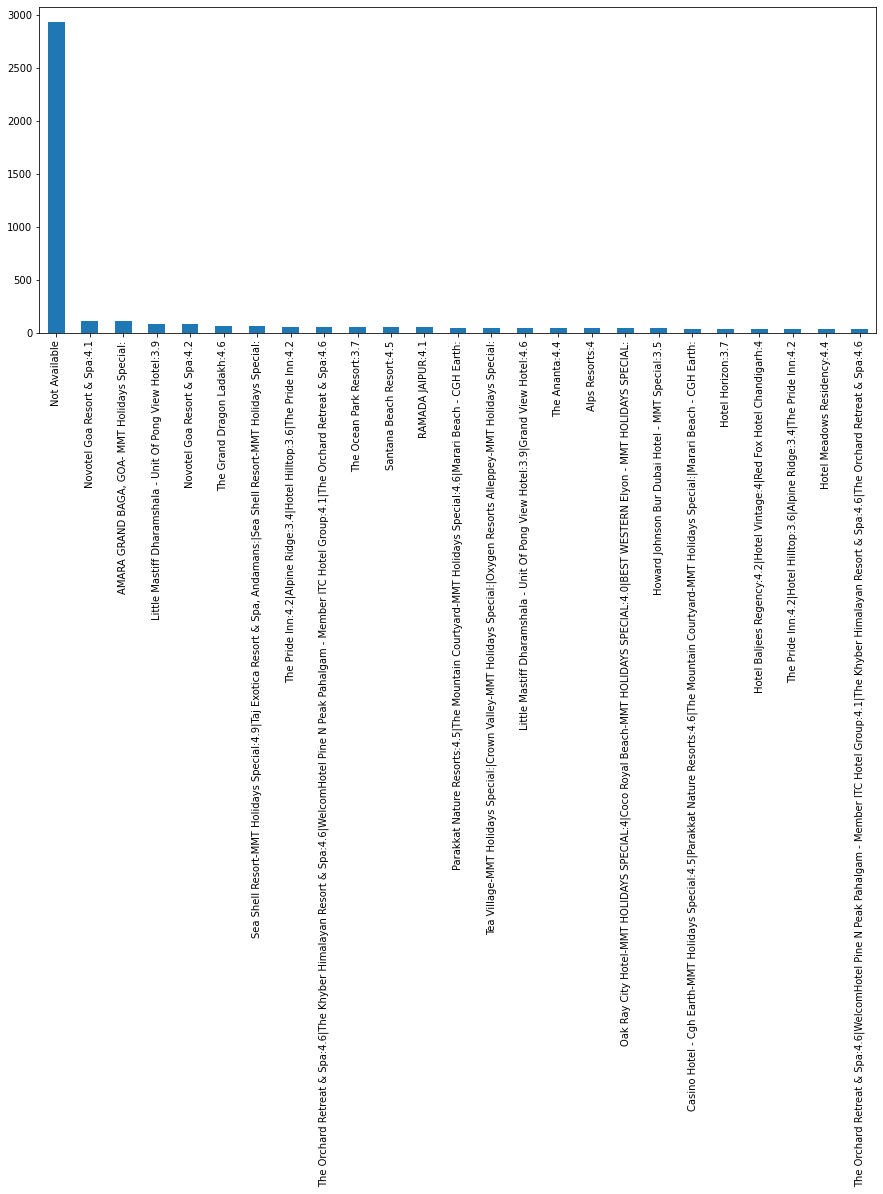

In [39]:
train['Hotel Details'].value_counts().head(25).plot.bar(figsize = (15, 6))

In [40]:
train['Hotel Details'].replace(to_replace = 'Not Available', value = '_NoDetails_', inplace = True)
train['Hotel Details'].value_counts()

_NoDetails_                                                                                                                                                               2929
Novotel Goa Resort & Spa:4.1                                                                                                                                               115
AMARA GRAND BAGA, GOA- MMT Holidays Special:                                                                                                                               112
Little Mastiff Dharamshala - Unit Of Pong View Hotel:3.9                                                                                                                    87
Novotel Goa Resort & Spa:4.2                                                                                                                                                79
                                                                                                                             

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [42]:
# Converting 'Travel Date' from object to 'datetime format'

train['Travel Date'] = pd.to_datetime(train['Travel Date'])

# Extracting Month of Travel from Travel Date 
train['Travel_Month'] = train['Travel Date'].dt.month

# Getting Month Name according to Calender

import calendar
train['Travel_Month_Calender'] = train['Travel_Month'].apply(lambda x: calendar.month_abbr[x])

# df['Month-str'] = df['Date'].dt.strftime('%b')
# df['Month-str-full'] = df['Date'].dt.strftime('%B')

train.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Primary_Stop,Other_Stops,Period_NightStays,Travel_Month,Travel_Month_Calender
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,_NoDetails_,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,New Delhi,Shimla|Manali|Chandigarh,6,7,Jul
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,Srinagar,Pahalgam|Srinagar,4,8,Aug


In [43]:
train.drop(['Uniq Id', 'Destination', 'Itinerary', 'Travel Date', 'Hotel Details', 'Airline', 'Other_Stops', 'Travel_Month'],
           axis = 1, inplace = True)
train.head(3)

,Package Name,Package Type,Places Covered,Start City,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Primary_Stop,Period_NightStays,Travel_Month_Calender
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,Mumbai,2,3,Not Available,Not Available,11509.0,New Delhi,6,Jul
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,New Delhi,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,Srinagar,4,Aug
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,New Delhi,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,Udaipur,3,Apr


<AxesSubplot:title={'center':'Trvel Month (Calender-wise)'}>

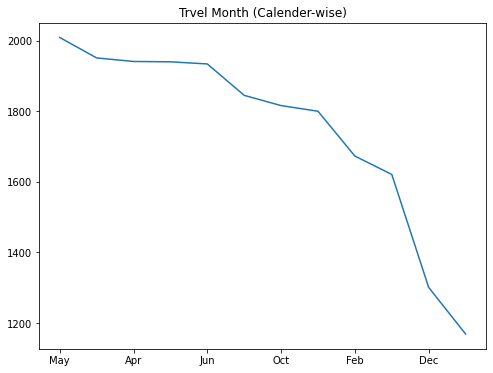

In [44]:
train['Travel_Month_Calender'].value_counts().plot(kind = 'line', figsize = (8, 6), title = 'Trvel Month (Calender-wise)')

- May (5th) month has **peak season & highly crowded**.
- while Jan (1st) month  has **truce season & lowly crowded**.
- from above Line graph we can also see the crowd is decresing from May to January. We can also say that the Line has **Downward Tendency**

<AxesSubplot:title={'center':'Night Stay Period'}>

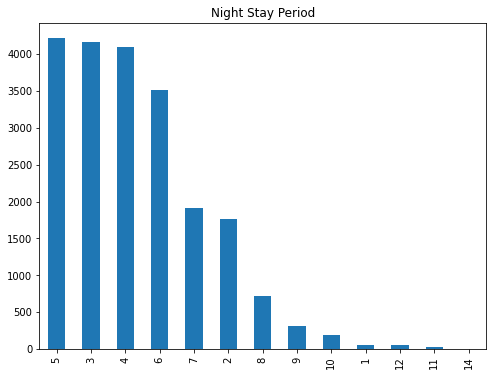

In [45]:
train['Period_NightStays'].value_counts(sort = True).plot(kind = 'bar', figsize = (8, 6), title = 'Night Stay Period')

 From above Bar Chart we can conclude that,
  - Plot is showing **Downward Slop** with very high volumns in interval
  - Initially down-fall is minor but later it falled very much.
  - When we look at tail of graph we can see **1N + 12N + 11 + 14N** are having **very low demanded**.

<AxesSubplot:title={'center':'Period_NightStay wise Price per Person'}, xlabel='Period_NightStays', ylabel='Per Person Price'>

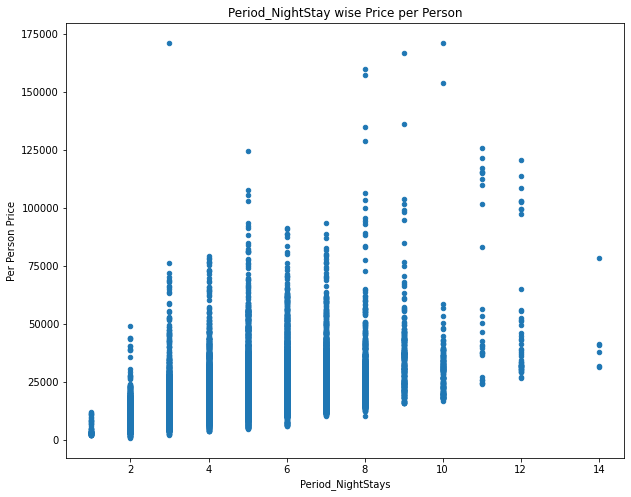

In [46]:
train.plot(x = 'Period_NightStays', y = 'Per Person Price', kind = 'scatter', figsize = (10, 8),
           title = 'Period_NightStay wise Price per Person')

<AxesSubplot:title={'center':'City-wise Median Per Person Price'}, xlabel='Start City'>

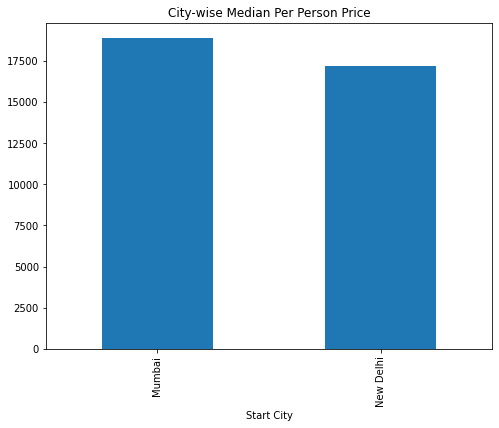

In [47]:
citywise_price = train.groupby('Start City')['Per Person Price'].median()
citywise_price.plot.bar(figsize = (8, 6), title = "City-wise Median Per Person Price")

<AxesSubplot:title={'center':'Period_NightStay wise Price per Person'}, xlabel='Start City', ylabel='Per Person Price'>

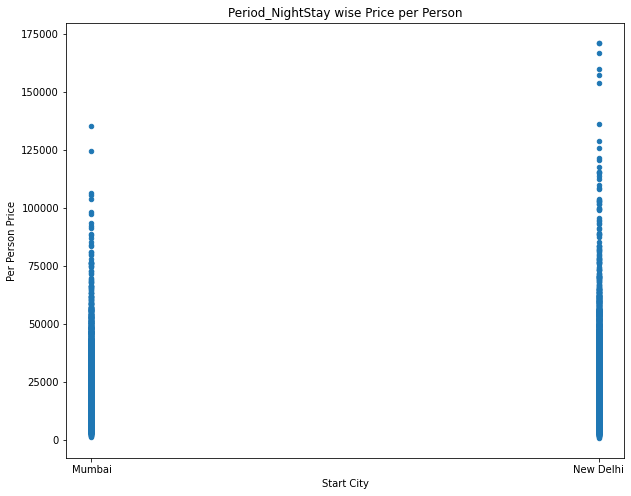

In [48]:
train.plot(x = 'Start City', y = 'Per Person Price', kind = 'scatter', figsize = (10, 8),
           title = 'Period_NightStay wise Price per Person')

In [49]:
train.corr()

,Flight Stops,Meals,Per Person Price,Period_NightStays
Flight Stops,1.000000,-0.835629,-0.281276,-0.008713
Meals,-0.835629,1.000000,0.266456,0.022615
Per Person Price,-0.281276,0.266456,1.000000,0.510186
Period_NightStays,-0.008713,0.022615,0.510186,1.000000


<AxesSubplot:>

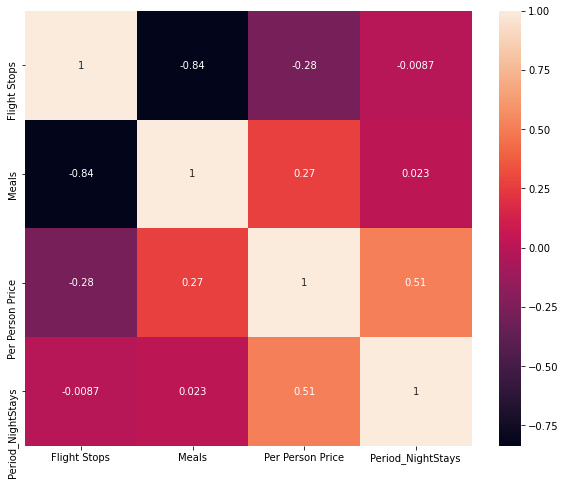

In [50]:
plt.figure(figsize = (10, 8))
sns.heatmap(train.corr() , annot=True)

### Data Preprocessing

In [51]:
train.nunique()

Package Name                   2204
Package Type                      5
Places Covered                  565
Start City                        2
Flight Stops                      3
Meals                             4
Sightseeing Places Covered     1714
Cancellation Rules               10
Per Person Price              17138
Primary_Stop                    117
Period_NightStays                13
Travel_Month_Calender            12
dtype: int64

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Package Name                21000 non-null  object 
 1   Package Type                21000 non-null  object 
 2   Places Covered              21000 non-null  object 
 3   Start City                  21000 non-null  object 
 4   Flight Stops                21000 non-null  int64  
 5   Meals                       21000 non-null  int64  
 6   Sightseeing Places Covered  21000 non-null  object 
 7   Cancellation Rules          21000 non-null  object 
 8   Per Person Price            21000 non-null  float64
 9   Primary_Stop                21000 non-null  object 
 10  Period_NightStays           21000 non-null  int64  
 11  Travel_Month_Calender       21000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.9+ MB


In [53]:

# # Creating Separate Object DataType and Numerical DataType
# object_col = X.select_dtypes(include='object').columns
# num_col = X.select_dtypes(include='number').columns

# # cat_col = train.columns[train.dtypes == 'objects']
# # num_col = train.columns[train.dtypes != 'objects']


# # Appying Label Encoder on train data
# le = LabelEncoder()
# X_enc = X.apply(LabelEncoder().fit_transform)
# X_enc

In [54]:
SEED = 41

# Splitting Train data into X, y

X = train.drop('Per Person Price', axis = 1)
y = train['Per Person Price']

print('>>> X shape       : ', X.shape)
print('>>> y shape       : ', y.shape)
print('-' * 35)

# Appying Label Encoder on train data
le = LabelEncoder()
X_enc = X.apply(LabelEncoder().fit_transform)


# Splitting X, y into Train & test
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.2, random_state=0)

print('>>> X_train shape : ', X_train.shape)
print('>>> X_test shape  : ', X_test.shape)
print('>>> y_train shape : ', y_train.shape)
print('>>> y_test shape  : ', y_test.shape)
print('-' * 35)

>>> X shape       :  (21000, 11)
>>> y shape       :  (21000,)
-----------------------------------
>>> X_train shape :  (16800, 11)
>>> X_test shape  :  (4200, 11)
>>> y_train shape :  (16800,)
>>> y_test shape  :  (4200,)
-----------------------------------


In [55]:
X_enc

,Package Name,Package Type,Places Covered,Start City,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Primary_Stop,Period_NightStays,Travel_Month_Calender
0,421,4,417,0,2,1,1713,5,79,5,5
1,1138,3,533,1,0,3,524,0,107,3,1
2,1417,2,549,1,0,2,1000,0,113,2,0
3,486,3,329,1,0,3,1094,0,71,5,1
4,196,3,443,1,0,3,336,0,86,6,2
...,...,...,...,...,...,...,...,...,...,...,...
20995,1799,1,500,0,1,1,1046,0,102,5,0
20996,375,2,529,1,0,2,538,0,107,6,1
20997,217,1,103,1,1,1,1444,0,22,4,3
20998,320,1,151,1,1,1,1602,0,28,5,4


### Base Model Building

- **Advanced Regression Methods**-
   1. Linear Regression
   2. PLSRegression
   3. Ridge Regression
   4. Lasso Regression
   5. ElasticNet


- **Ensemble Methods** -
   1. RandomForestRegrressor
   2. AdaBoostRegressor
   3. GradientBoostingRegressor
   

### Advance Regression Methods
**1. LinearRegression** (to know data distributed linearly or not)

In [56]:
lin_reg = LinearRegression().fit(X_train, y_train)

# Checking Coefficient
print('>>> Coefficient at Best fit line : ', lin_reg.coef_)
print()

# Checking Intercept
print('>>> Intercept of Best fit line : ', lin_reg.intercept_)
print()

# Predict 
lin_prdict = lin_reg.predict(X_test)

# Root Mean Squred Log Error
rmsle_lin = round(np.sqrt(mean_squared_log_error(y_test, lin_prdict)), 4)

# Displaying Root Mean Sqyared Log Error
print(f'>>> Root Mean Squred Error for Linear Regression : {rmsle_lin}')

>>> Coefficient at Best fit line :  [ 4.41333902e-01  4.88805118e+02  6.82760132e+01 -1.51560848e+02
 -4.11689670e+03  4.27006697e+01 -9.70159924e-01 -2.48005943e+02
 -3.38078481e+02  3.02135257e+03 -2.33213333e+01]

>>> Intercept of Best fit line :  12130.18119763863

>>> Root Mean Squred Error for Linear Regression : 0.4087


**2. PLS Regression**

In [57]:
plsre = PLSRegression().fit(X_train, y_train)

# Prediction
pls_pred = plsre.predict(X_test)

# Root Mean Squred Log Error
rmsle_pls = round(np.sqrt(mean_squared_log_error(y_test, pls_pred)), 4)

# Displaying Root Mean Sqyared Log Error
print(f'>>> Root Mean Squred Error for PLS Regression : {rmsle_pls}')

>>> Root Mean Squred Error for PLS Regression : 0.4118


**3. Ridge Regression**


In [58]:
ridge = Ridge().fit(X_train, y_train)

# Prediction
rid_pred = ridge.predict(X_test)

# Root Mean Squred Log Error
rmsle_rid = round(np.sqrt(mean_squared_log_error(y_test, rid_pred)), 4)

# Displaying Root Mean Sqyared Log Error
print(f'>>> Root Mean Squred Error for Ridge Regression : {rmsle_rid}')

>>> Root Mean Squred Error for Ridge Regression : 0.4087


**4. Lasso Regression**

In [59]:
lasso_reg = Lasso().fit(X_train, y_train)

# Prediction
lasso_pred = lasso_reg.predict(X_test)

# Root Mean Squred Log Error
rmsle_lasso = round(np.sqrt(mean_squared_log_error(y_test, lasso_pred)), 4)

# Displaying Root Mean Sqyared Log Error
print(f'>>> Root Mean Squred Error for Lasso Regression : {rmsle_lasso}')

>>> Root Mean Squred Error for Lasso Regression : 0.4087


**5. ElasticNet**

In [60]:
elasNet = ElasticNet().fit(X_train, y_train)

# Prediction
elasNet_pred = elasNet.predict(X_test)

# Root Mean Squred Log Error
rmsle_elasNet = round(np.sqrt(mean_squared_log_error(y_test, elasNet_pred)), 4)

# Displaying Root Mean Sqyared Log Error
print(f'>>> Root Mean Squred Error for ElasticNet Regression : {rmsle_elasNet}')

>>> Root Mean Squred Error for ElasticNet Regression : 0.4087


### Ensemble Methods

**1. Random Forest Regressor**

In [61]:
ranForest = RandomForestRegressor().fit(X_train, y_train)

# Prediction
rf_pred = ranForest.predict(X_test)

# Root Mean Squred Log Error
rmsle_rf = round(np.sqrt(mean_squared_log_error(y_test, rf_pred)), 4)

# Displaying Root Mean Sqyared Log Error
print(f'>>> Root Mean Squred Error for Random Forest Regression : {rmsle_rf}')

>>> Root Mean Squred Error for Random Forest Regression : 0.2265


**2. AdaBoost Regressor**

In [62]:
adaBoost = AdaBoostRegressor().fit(X_train, y_train)

# Prediction
ada_pred = adaBoost.predict(X_test)

# Root Mean Squred Log Error
rmsle_ada = round(np.sqrt(mean_squared_log_error(y_test, ada_pred)), 4)

# Displaying Root Mean Sqyared Log Error
print(f'>>> Root Mean Squred Error for AdaBoost Regression : {rmsle_ada}')

>>> Root Mean Squred Error for AdaBoost Regression : 0.5522


**3. Gradient Boosting Regressor**

In [63]:
gradBoost = GradientBoostingRegressor().fit(X_train, y_train)

# Prediction
grad_pred = gradBoost.predict(X_test)

# Root Mean Squred Log Error
rmsle_grad = round(np.sqrt(mean_squared_log_error(y_test, grad_pred)), 4)

# Displaying Root Mean Sqyared Log Error
print(f'>>> Root Mean Squred Error for Gradient Boost Regression : {rmsle_grad}')

>>> Root Mean Squred Error for Gradient Boost Regression : 0.3243


### Feature Engineering

**Feature Scaling**
- **Applying Different Scalers**
    1. Standard Sclaer
    2. MinMax Scaler


**Feature Selection**

In [67]:

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=mutual_info_regression)
ordered_feature=ordered_rank_features.fit(X_enc,y)


scores = pd.DataFrame(ordered_feature.scores_, columns=["Score"])
columns = pd.DataFrame(X_enc.columns)

# Creating New DataFrame by combining Scores & Columns
features_rank=pd.concat([columns,scores],axis=1)
features_rank.columns=['Features','Score']

Feature ranking:
1. feature 9 (0.286421)
2. feature 6 (0.191902)
3. feature 0 (0.121723)
4. feature 2 (0.117683)
5. feature 8 (0.083112)
6. feature 10 (0.063062)
7. feature 5 (0.053706)
8. feature 4 (0.048294)
9. feature 3 (0.015722)
10. feature 1 (0.010710)
11. feature 7 (0.007667)


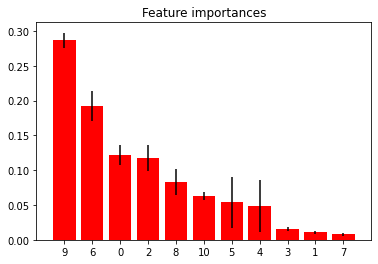

In [65]:
# Feature Importance

forest = RandomForestRegressor(n_estimators=250,
                              random_state=SEED)

forest.fit(X_enc, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [66]:
features_rank.sort_values(by = 'Score', ascending=False)

,Features,Score
9,Period_NightStays,0.255710
4,Flight Stops,0.090610
1,Package Type,0.087258
7,Cancellation Rules,0.085554
5,Meals,0.076213
8,Primary_Stop,0.058285
2,Places Covered,0.051637
0,Package Name,0.039714
6,Sightseeing Places Covered,0.035461
3,Start City,0.016104


- Model Based Featrue Selection - RandomForestRegressor()

    1. feature 9 (0.286600) -  Period_NightStays
    2. feature 6 (0.192615) -  Sightseeing Places Covered
    3. feature 0 (0.119614) -  Package Name
    4. feature 2 (0.118248) -  Places Covered
    5. feature 8 (0.082391) -  Primary_Stop
    
 
- Mutual_info_regression based Feature Selection

    9. Period_NightStays	0.255438
    4. Flight Stops	0.089847
    1.	Package Type	0.087558
    7.	Cancellation Rules	0.085332
    5.	Meals	0.076108

